In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from lib.color_transfer import color_transfer
# from lib.color_transfer3 import color_transfer_convolutional_w2_exact, show_figure11_like

In [2]:
# imageA = io.imread("./data/majestic-mountain-peaks.jpg") / 255.0
# #imageA = io.imread("./data/serene-beach-sunset.jpg") / 255.0
# # imageA = io.imread("./data/beach_at_day.png") / 255.0
# # imageA = io.imread("./data/classic-car-sunset.jpg") / 255.0
# # imageA = io.imread("./data/majestic-mountainous-vista.jpg") / 255.0
# imageB = io.imread("./data/Sunset.jpg") / 255.0


# transferredA, transferredB, mu_bar = color_transfer(imageA, imageB, n_bins=64, t=0.0, gamma=0.001, match_l=False, sharpen_entropy=True, max_iter=2000, tol=1e-5)

# plt.figure(figsize=(15,5))
# plt.subplot(1,4,1)
# plt.imshow(imageA)
# plt.title("Image A")
# plt.axis("off")

# plt.subplot(1,4,2)
# plt.imshow(imageB)
# plt.title("Image B")
# plt.axis("off")

# plt.subplot(1,4,3)
# plt.imshow(transferredA)
# plt.title("Color Transferred (A → B)")
# plt.axis("off")

# plt.subplot(1,4,4)
# plt.imshow(transferredB)
# plt.title("Color Transferred (B → A)")
# plt.axis("off")


# plt.savefig("transferred_image.png")
# plt.show()

t = 0.0 done


/mnt5/home/netanel/wasserstein_convolution/lib/color_transfer.py:284: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 21 negative Z values that have been clipped to zero
  out_src_rgb = color.lab2rgb(out_src_lab)


t = 0.25 done


/mnt5/home/netanel/wasserstein_convolution/lib/color_transfer.py:284: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 14092 negative Z values that have been clipped to zero
  out_src_rgb = color.lab2rgb(out_src_lab)


t = 0.5 done


/mnt5/home/netanel/wasserstein_convolution/lib/color_transfer.py:284: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 37056 negative Z values that have been clipped to zero
  out_src_rgb = color.lab2rgb(out_src_lab)


t = 0.75 done


/mnt5/home/netanel/wasserstein_convolution/lib/color_transfer.py:284: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 54433 negative Z values that have been clipped to zero
  out_src_rgb = color.lab2rgb(out_src_lab)


t = 1.0 done


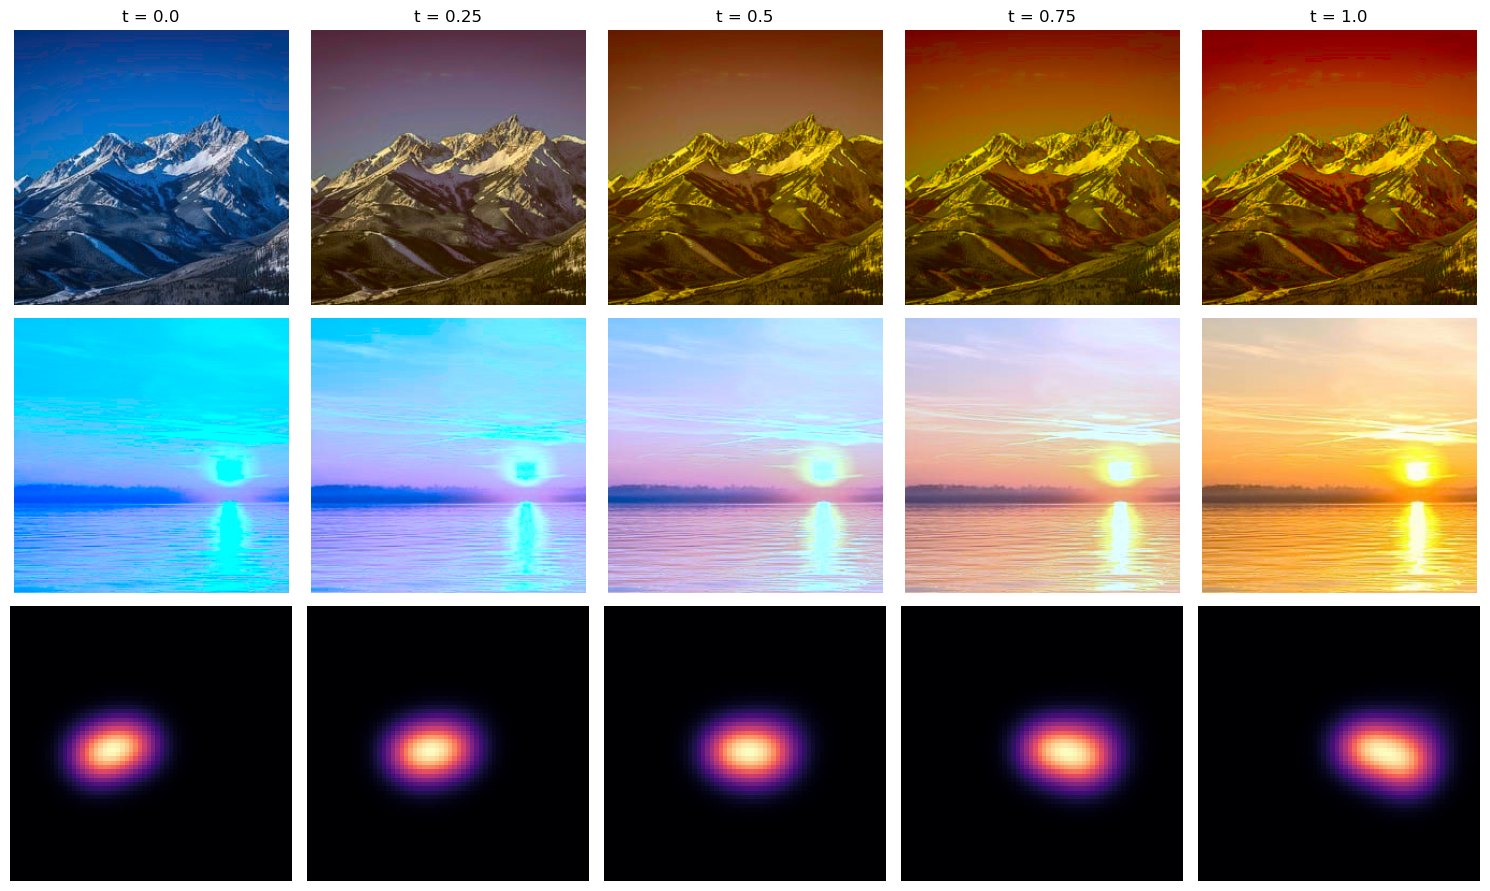

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Load images
imageA = io.imread("./data/majestic-mountain-peaks.jpg") / 255.0
imageB = io.imread("./data/Sunset.jpg") / 255.0

# List of interpolation values for color transfer
t_values = [0.0, 0.25, 0.5, 0.75, 1.0]

# Store results for visualization
transferredA_list = []
transferredB_list = []
mu_bar_list = []

# Run color transfer for each t
for t in t_values:
    transferredA, transferredB, mu_bar = color_transfer(
        imageA, imageB, n_bins=64, t=t, gamma=0.01, 
        match_l=False, sharpen_entropy=True, max_iter=2000, tol=1e-5
    )
    transferredA_list.append(transferredA)
    transferredB_list.append(transferredB)
    mu_bar_list.append(mu_bar)
    print(f"t = {t} done")

# Create figure with 3 rows and len(t_values) columns
fig, axes = plt.subplots(3, len(t_values), figsize=(15, 9))

# Plot first row: Original ImageA
for i, t in enumerate(t_values):
    axes[0, i].imshow(transferredA_list[i])
    axes[0, i].set_title(f"t = {t}")
    axes[0, i].axis("off")

# Plot second row: Transferred ImageB
for i, t in enumerate(t_values):
    axes[1, i].imshow(transferredB_list[i])
    axes[1, i].axis("off")

# Plot third row: Histogram mu_bar (color distributions)
for i, t in enumerate(t_values):
    axes[2, i].imshow(mu_bar_list[i], cmap="magma", aspect="auto")
    axes[2, i].axis("off")

# Set row labels
axes[0, 0].set_ylabel("Image A")
axes[1, 0].set_ylabel("Image B")
axes[2, 0].set_ylabel("μ_bar")

# Save figure
plt.tight_layout()
plt.savefig("color_transfer_interpolation.jpg")
plt.show()
